In [1]:
# 필요한 라이브러리 생성
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
print(tf.__version__)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

2.4.1


In [2]:
# 데이터 생성
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train = train['label']
X_train = train.iloc[:, 1:]
X_test = test

X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)

y_train = to_categorical(y_train)
y_train.shape

(42000, 10)

In [5]:
# 데이터를 0과 1 사이의 수로 바꾼다.
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# 데이터를 훈련세트와 검증세트로 나눈다.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=10)

X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((37800, 28, 28, 1),
 (4200, 28, 28, 1),
 (37800, 10),
 (4200, 10),
 (28000, 28, 28, 1))

In [7]:
# CNN 모델 생성
networks = 15
model = [0] * networks
optimizer= Nadam(learning_rate=0.001)

for i in range(networks):
    model[i] = Sequential()

    model[i].add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model[i].add(BatchNormalization())
    model[i].add(Conv2D(32, (3, 3), activation='relu'))
    model[i].add(BatchNormalization())
    model[i].add(Conv2D(32, (5, 5), strides=2, padding='same', activation='relu'))
    model[i].add(BatchNormalization())
    model[i].add(Dropout(0.4))

    model[i].add(Conv2D(64, (3, 3), activation='relu'))
    model[i].add(BatchNormalization())
    model[i].add(Conv2D(64, (3, 3), activation='relu'))
    model[i].add(BatchNormalization())
    model[i].add(Conv2D(64, (5, 5), strides=2, padding='same', activation='relu'))
    model[i].add(BatchNormalization())
    model[i].add(Dropout(0.4))

    model[i].add(Flatten())
    model[i].add(Dense(128, activation='relu'))
    model[i].add(BatchNormalization())
    model[i].add(Dropout(0.4))
    model[i].add(Dense(10, activation='softmax'))
    
    model[i].compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# model = Sequential()

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(Conv2D(32, (5, 5), strides=2, activation='relu', padding='same'))
# model.add(Dropout(0.4))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Conv2D(64, (5, 5), strides=2, activation='relu', padding='same'))
# model.add(Dropout(0.4))

# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(10, activation='softmax'))

In [8]:
model[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0

In [9]:
LR = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
# LR = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [10]:
epochs= 45
fit_model = [0] * networks

for i in range(networks):
    # 훈련 세트를 기준으로 무작위 데이터 생성
    imgdatagen = ImageDataGenerator(rotation_range=15, zoom_range=0.15, shear_range=0.1,
                                width_shift_range=0.1, height_shift_range=0.1)
    imgdatagen.fit(X_train)
    model[i].fit(imgdatagen.flow(X_train, y_train, batch_size=64), epochs=epochs,
                 steps_per_epoch = X_train.shape[0] // 64, validation_data=(X_val, y_val), callbacks=[LR])
    model[i].fit(X_train, y_train, epochs=1, steps_per_epoch = X_train.shape[0] // 64, validation_data=(X_val, y_val))

Epoch 1/45
590/590 [==============================] - 23s 26ms/step - loss: 1.0005 - accuracy: 0.6970 - val_loss: 0.2208 - val_accuracy: 0.9319
Epoch 2/45
590/590 [==============================] - 16s 27ms/step - loss: 0.1693 - accuracy: 0.9480 - val_loss: 0.0353 - val_accuracy: 0.9893
Epoch 3/45
590/590 [==============================] - 16s 27ms/step - loss: 0.1173 - accuracy: 0.9638 - val_loss: 0.0328 - val_accuracy: 0.9898
Epoch 4/45
590/590 [==============================] - 14s 24ms/step - loss: 0.0966 - accuracy: 0.9714 - val_loss: 0.0312 - val_accuracy: 0.9888
Epoch 5/45
590/590 [==============================] - 14s 24ms/step - loss: 0.0798 - accuracy: 0.9768 - val_loss: 0.0303 - val_accuracy: 0.9900
Epoch 6/45
590/590 [==============================] - 15s 25ms/step - loss: 0.0696 - accuracy: 0.9789 - val_loss: 0.0324 - val_accuracy: 0.9905
Epoch 7/45
590/590 [==============================] - 17s 28ms/step - loss: 0.0661 - accuracy: 0.9793 - val_loss: 0.0190 - val_accuracy:

In [11]:
for i in range(networks):
    print(i+1, 'train_accuracy', round(accuracy_score(np.argmax(model[i].predict(X_train), axis=1),
                                                np.argmax(y_train, axis=1)), 5),
               'val_accuracy', round(accuracy_score(np.argmax(model[i].predict(X_val), axis=1),
                                                np.argmax(y_val, axis=1)), 5))

1 train_accuracy 0.99918 val_accuracy 0.99643
2 train_accuracy 0.9991 val_accuracy 0.99619
3 train_accuracy 0.99913 val_accuracy 0.99738
4 train_accuracy 0.99902 val_accuracy 0.99643
5 train_accuracy 0.99913 val_accuracy 0.99595
6 train_accuracy 0.99902 val_accuracy 0.99524
7 train_accuracy 0.99915 val_accuracy 0.995
8 train_accuracy 0.99937 val_accuracy 0.99595
9 train_accuracy 0.9991 val_accuracy 0.99571
10 train_accuracy 0.99913 val_accuracy 0.99595
11 train_accuracy 0.99905 val_accuracy 0.99524
12 train_accuracy 0.99918 val_accuracy 0.99619
13 train_accuracy 0.99926 val_accuracy 0.99548
14 train_accuracy 0.99907 val_accuracy 0.99643
15 train_accuracy 0.99915 val_accuracy 0.99619


In [12]:
# 캐글에 제출할 파일 생성
results = np.zeros((X_test.shape[0], 10)) 
for i in range(networks):
    results = results + model[i].predict(X_test)

submission = pd.DataFrame({'ImageId': range(1, X_test.shape[0]+1) ,'Label': np.argmax(results, axis=1)})
submission.to_csv('submission_ensemble.csv', index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


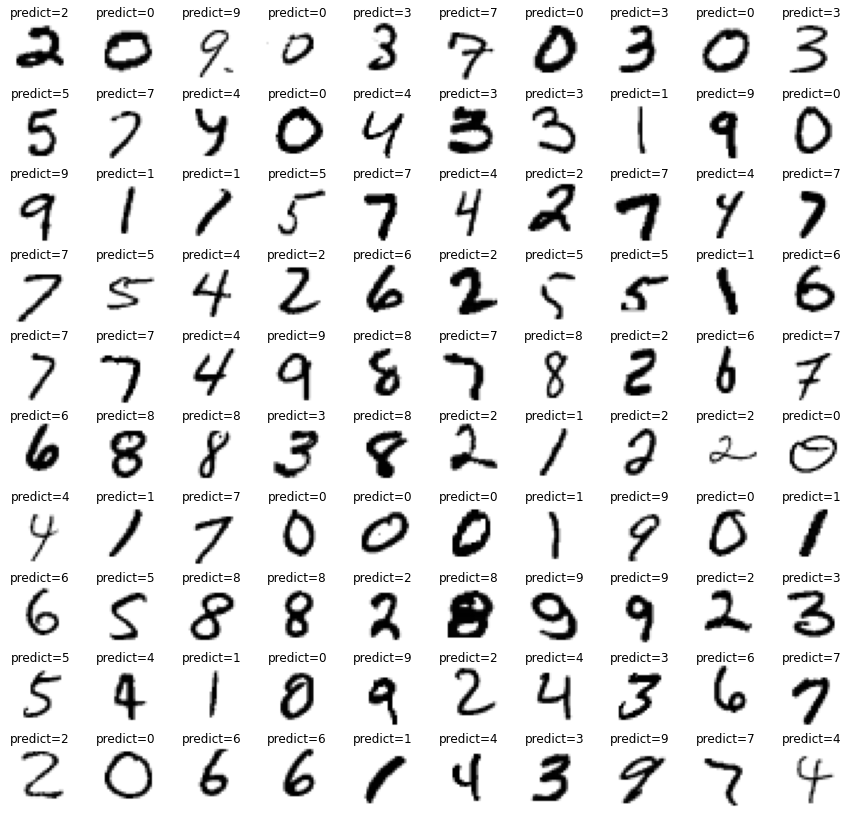

In [13]:
# 테스트 세트에서 100개의 예제를 확인
plt.figure(figsize=(15,15))
for i in range(100):  
    plt.subplot(10, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title("predict=%d" % submission.iloc[i, 1], y=0.9)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)